In [ ]:
print ("بسم الله والحمدلله والصلاة والسلام على رسول الله صلى الله عليه وسلم")

بسم الله والحمدلله والصلاة والسلام على رسول الله صلى الله عليه وسلم


In [ ]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar
from tabulate import tabulate

#McNemar Test For Majority Voting

In [ ]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar
from tabulate import tabulate

def load_predictions(file_path):
    """
    Reads a .txt file with fixed headers:
    Token, Gold Tag, Predicted Tag
    """
    df = pd.read_csv(file_path, sep="\t", comment="#", skip_blank_lines=True)
    df = df[["Token", "Gold Tag", "Predicted Tag"]].dropna()
    return df

baseline_files = [
    "/content/Camel_ca_predictions_CANER_Corpus.txt",
    "/content/Camel_msa_predictions_CANER_Corpus.txt",
    "/content/Camel_mix_predictions_CANER_Corpus.txt",
    "/content/Arbert_predictions_CANER_Corpus.txt"
]

ensemble_file = "/content/Compined_Predictions_Majority_CANER.txt"

ensemble = load_predictions(ensemble_file)

results_summary = []
tables = {}

for file in baseline_files:
    baseline = load_predictions(file)
    assert len(baseline) == len(ensemble), f"❌ File {file} length mismatch!"

    baseline_correct = baseline["Gold Tag"] == baseline["Predicted Tag"]
    ensemble_correct = ensemble["Gold Tag"] == ensemble["Predicted Tag"]

    a = sum(baseline_correct & ensemble_correct)
    b = sum(baseline_correct & ~ensemble_correct)
    c = sum(~baseline_correct & ensemble_correct)
    d = sum(~baseline_correct & ~ensemble_correct)

    table = [[a, b], [c, d]]
    tables[file] = table

    result = mcnemar(table, exact=False, correction=True)
    significance = "Significant (p < 0.05)" if result.pvalue < 0.05 else "Not significant"

    results_summary.append([
        file.replace(".txt", "").split("/")[-1],
        result.statistic,
        result.pvalue,
        significance
    ])

print("\n=== Statistical Significance Results (McNemar Test) ===\n")
headers = ["Baseline Model", "Chi² Statistic", "p-value", "Significance"]
print(tabulate(results_summary, headers=headers, tablefmt="grid", floatfmt=".5f"))

print("\n=== Detailed 2x2 Comparison Tables ===")
for file, table in tables.items():
    print(f"\n{file.replace('.txt', '').split('/')[-1]}:")
    print(tabulate(
        table,
        headers=["Ensemble Correct", "Ensemble Wrong"],
        showindex=["Baseline Correct", "Baseline Wrong"],
        tablefmt="fancy_grid"
    ))



=== Statistical Significance Results (McNemar Test) ===

+------------------------------------+------------------+-----------+------------------------+
| Baseline Model                     |   Chi² Statistic |   p-value | Significance           |
+====================================+==================+===========+========================+
| Camel_ca_predictions_CANER_Corpus  |          0.14062 |   0.70766 | Not significant        |
+------------------------------------+------------------+-----------+------------------------+
| Camel_msa_predictions_CANER_Corpus |         10.61765 |   0.00112 | Significant (p < 0.05) |
+------------------------------------+------------------+-----------+------------------------+
| Camel_mix_predictions_CANER_Corpus |          2.01667 |   0.15558 | Not significant        |
+------------------------------------+------------------+-----------+------------------------+
| Arbert_predictions_CANER_Corpus    |          2.84058 |   0.09191 | Not significant  

#McNemar Test Weighted Voting


In [ ]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar
from tabulate import tabulate

def load_predictions(file_path):
    """
    Reads a .txt file with fixed headers:
    Token, Gold Tag, Predicted Tag
    """
    df = pd.read_csv(file_path, sep="\t", comment="#", skip_blank_lines=True)
    df = df[["Token", "Gold Tag", "Predicted Tag"]].dropna()
    return df

baseline_files = [
    "/content/Camel_ca_predictions_CANER_Corpus.txt",
    "/content/Camel_msa_predictions_CANER_Corpus.txt",
    "/content/Camel_mix_predictions_CANER_Corpus.txt",
    "/content/Arbert_predictions_CANER_Corpus.txt"
]

ensemble_file = "/content/Compined_Predictions_Weighted_CANER.txt"

ensemble = load_predictions(ensemble_file)

results_summary = []
tables = {}

for file in baseline_files:
    baseline = load_predictions(file)
    assert len(baseline) == len(ensemble), f"❌ File {file} length mismatch!"

    baseline_correct = baseline["Gold Tag"] == baseline["Predicted Tag"]
    ensemble_correct = ensemble["Gold Tag"] == ensemble["Predicted Tag"]

    a = sum(baseline_correct & ensemble_correct)
    b = sum(baseline_correct & ~ensemble_correct)
    c = sum(~baseline_correct & ensemble_correct)
    d = sum(~baseline_correct & ~ensemble_correct)

    table = [[a, b], [c, d]]
    tables[file] = table

    result = mcnemar(table, exact=False, correction=True)
    significance = "Significant (p < 0.05)" if result.pvalue < 0.05 else "Not significant"

    results_summary.append([
        file.replace(".txt", "").split("/")[-1],
        result.statistic,
        result.pvalue,
        significance
    ])

print("\n=== Statistical Significance Results (McNemar Test) ===\n")
headers = ["Baseline Model", "Chi² Statistic", "p-value", "Significance"]
print(tabulate(results_summary, headers=headers, tablefmt="grid", floatfmt=".5f"))

print("\n=== Detailed 2x2 Comparison Tables ===")
for file, table in tables.items():
    print(f"\n{file.replace('.txt', '').split('/')[-1]}:")
    print(tabulate(
        table,
        headers=["Ensemble Correct", "Ensemble Wrong"],
        showindex=["Baseline Correct", "Baseline Wrong"],
        tablefmt="fancy_grid"
    ))



=== Statistical Significance Results (McNemar Test) ===

+------------------------------------+------------------+-----------+------------------------+
| Baseline Model                     |   Chi² Statistic |   p-value | Significance           |
+====================================+==================+===========+========================+
| Camel_ca_predictions_CANER_Corpus  |          0.69444 |   0.40466 | Not significant        |
+------------------------------------+------------------+-----------+------------------------+
| Camel_msa_predictions_CANER_Corpus |         13.56452 |   0.00023 | Significant (p < 0.05) |
+------------------------------------+------------------+-----------+------------------------+
| Camel_mix_predictions_CANER_Corpus |          7.60345 |   0.00583 | Significant (p < 0.05) |
+------------------------------------+------------------+-----------+------------------------+
| Arbert_predictions_CANER_Corpus    |          8.11268 |   0.00440 | Significant (p < 

#Boot Strap for Majority voting

+-------------------------------------------------+----------------------+--------------+---------------+------------------------+
| Baseline Model                                  |   Mean Accuracy Diff |   95% CI Low |   95% CI High | Significance           |
+=================================================+======================+==============+===============+========================+
| /content/Camel_ca_predictions_CANER_Corpus.txt  |             -0.00014 |     -0.00076 |       0.00048 | Not significant        |
+-------------------------------------------------+----------------------+--------------+---------------+------------------------+
| /content/Camel_msa_predictions_CANER_Corpus.txt |              0.00080 |      0.00036 |       0.00128 | Significant (p < 0.05) |
+-------------------------------------------------+----------------------+--------------+---------------+------------------------+
| /content/Camel_mix_predictions_CANER_Corpus.txt |              0.00048 |     -0.0

/tmp/ipython-input-4199540796.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(distributions.values(), labels=[f.split('/')[-1].replace('_predictions_CANER_Corpus.txt', '') for f in baseline_files])


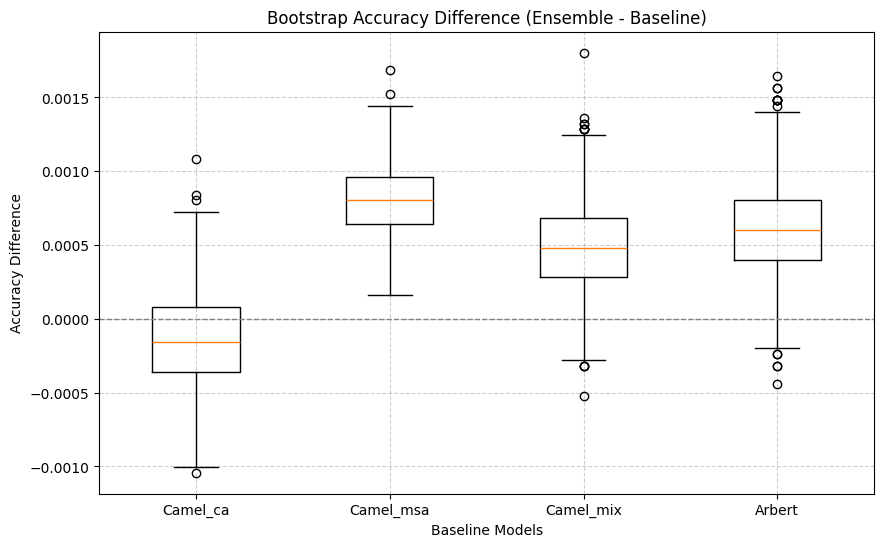

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# الملفات الأساسية
baseline_files = [
    "/content/Camel_ca_predictions_CANER_Corpus.txt",
    "/content/Camel_msa_predictions_CANER_Corpus.txt",
    "/content/Camel_mix_predictions_CANER_Corpus.txt",
    "/content/Arbert_predictions_CANER_Corpus.txt"
]

# ملف الموديل الجديد (ensemble)
ensemble_file = "/content/Compined_Predictions_Majority_CANER.txt"

# دالة التحميل الموحدة
def load_predictions(file):
    return pd.read_csv(file, sep="\t", comment="#")

# تحميل ملفات
ensemble = load_predictions(ensemble_file)

# عدد العينات bootstrap
N_BOOTSTRAP = 1000
results = []
distributions = {}

for file in baseline_files:
    baseline = load_predictions(file)

    # التحقق من الطول
    assert len(baseline) == len(ensemble), f"Length mismatch between {file} and ensemble."

    # مقارنة التوقعات
    baseline_correct = (baseline["Gold Tag"] == baseline["Predicted Tag"]).astype(int)
    ensemble_correct = (ensemble["Gold Tag"] == ensemble["Predicted Tag"]).astype(int)

    n = len(baseline_correct)
    rng = np.random.default_rng(seed=42)
    diff_distribution = []

    for _ in range(N_BOOTSTRAP):
        indices = rng.integers(0, n, n)
        diff = ensemble_correct.iloc[indices].mean() - baseline_correct.iloc[indices].mean()
        diff_distribution.append(diff)

    diff_distribution = np.array(diff_distribution)
    distributions[file] = diff_distribution

    mean_diff = diff_distribution.mean()
    ci_low, ci_high = np.percentile(diff_distribution, [2.5, 97.5])
    significant = "Significant (p < 0.05)" if ci_low > 0 or ci_high < 0 else "Not significant"

    results.append([file, mean_diff, ci_low, ci_high, significant])

# 📋 عرض النتائج كجدول
headers = ["Baseline Model", "Mean Accuracy Diff", "95% CI Low", "95% CI High", "Significance"]
print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".5f"))

# 📊 رسم توزيع الفروق (Boxplot)
plt.figure(figsize=(10, 6))
plt.boxplot(distributions.values(), labels=[f.split('/')[-1].replace('_predictions_CANER_Corpus.txt', '') for f in baseline_files])
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Bootstrap Accuracy Difference (Ensemble - Baseline)")
plt.ylabel("Accuracy Difference")
plt.xlabel("Baseline Models")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#Boot Strap for weighted voting

+-------------------------------------------------+----------------------+--------------+---------------+------------------------+
| Baseline Model                                  |   Mean Accuracy Diff |   95% CI Low |   95% CI High | Significance           |
+=================================================+======================+==============+===============+========================+
| /content/Camel_ca_predictions_CANER_Corpus.txt  |              0.00025 |     -0.00024 |       0.00072 | Not significant        |
+-------------------------------------------------+----------------------+--------------+---------------+------------------------+
| /content/Camel_msa_predictions_CANER_Corpus.txt |              0.00119 |      0.00056 |       0.00180 | Significant (p < 0.05) |
+-------------------------------------------------+----------------------+--------------+---------------+------------------------+
| /content/Camel_mix_predictions_CANER_Corpus.txt |              0.00087 |      0.0

/tmp/ipython-input-3955360236.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(distributions.values(), labels=[f.split('/')[-1].replace('_predictions_CANER_Corpus.txt', '') for f in baseline_files])


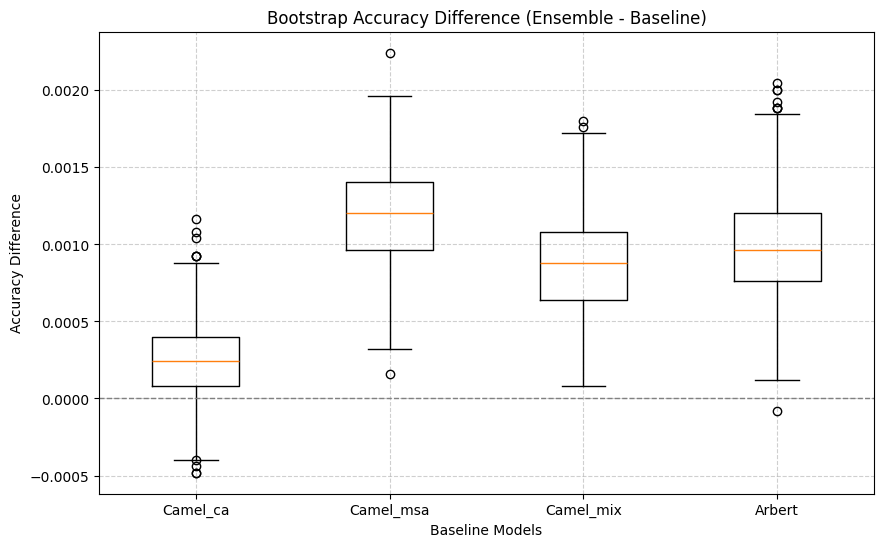

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# الملفات الأساسية
baseline_files = [
    "/content/Camel_ca_predictions_CANER_Corpus.txt",
    "/content/Camel_msa_predictions_CANER_Corpus.txt",
    "/content/Camel_mix_predictions_CANER_Corpus.txt",
    "/content/Arbert_predictions_CANER_Corpus.txt"
]

# ملف الموديل الجديد (ensemble)
ensemble_file = "/content/Compined_Predictions_Weighted_CANER.txt"

# دالة التحميل الموحدة
def load_predictions(file):
    return pd.read_csv(file, sep="\t", comment="#")

# تحميل ملفات
ensemble = load_predictions(ensemble_file)

# عدد العينات bootstrap
N_BOOTSTRAP = 1000
results = []
distributions = {}

for file in baseline_files:
    baseline = load_predictions(file)

    # التحقق من الطول
    assert len(baseline) == len(ensemble), f"Length mismatch between {file} and ensemble."

    # مقارنة التوقعات
    baseline_correct = (baseline["Gold Tag"] == baseline["Predicted Tag"]).astype(int)
    ensemble_correct = (ensemble["Gold Tag"] == ensemble["Predicted Tag"]).astype(int)

    n = len(baseline_correct)
    rng = np.random.default_rng(seed=42)
    diff_distribution = []

    for _ in range(N_BOOTSTRAP):
        indices = rng.integers(0, n, n)
        diff = ensemble_correct.iloc[indices].mean() - baseline_correct.iloc[indices].mean()
        diff_distribution.append(diff)

    diff_distribution = np.array(diff_distribution)
    distributions[file] = diff_distribution

    mean_diff = diff_distribution.mean()
    ci_low, ci_high = np.percentile(diff_distribution, [2.5, 97.5])
    significant = "Significant (p < 0.05)" if ci_low > 0 or ci_high < 0 else "Not significant"

    results.append([file, mean_diff, ci_low, ci_high, significant])

# 📋 عرض النتائج كجدول
headers = ["Baseline Model", "Mean Accuracy Diff", "95% CI Low", "95% CI High", "Significance"]
print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".5f"))

# 📊 رسم توزيع الفروق (Boxplot)
plt.figure(figsize=(10, 6))
plt.boxplot(distributions.values(), labels=[f.split('/')[-1].replace('_predictions_CANER_Corpus.txt', '') for f in baseline_files])
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Bootstrap Accuracy Difference (Ensemble - Baseline)")
plt.ylabel("Accuracy Difference")
plt.xlabel("Baseline Models")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
